# NEWSWIRES CLASSIFICATION - a multiclass classification using Reuters Dataset

### Multiclass classification
- Having imbalanced dataset
- more than two classes

In [216]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- loading the dataset

In [217]:
from keras.datasets import reuters

In [218]:
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)  # restricting the data to 10000 most frequently occuring

In [219]:
# checking length of trainig and test data
print(len(train_data))

print(len(test_data))

8982
2246


In [220]:
len(train_data[10])

31

In [221]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [222]:
# decoding newswires back to text

word_index = reuters.get_word_index()

reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [223]:
decoded_newswire = ''.join([reversed_word_index.get(i-3,'?') for i in train_data[0]])   # note that the indices are offset by 3 coz 0,1 and 2 are reveresed indices for "padding","start of sequence","unknown"

In [224]:
train_labels[10]

3

In [225]:
# preparing the data

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    
    for i, sequence  in enumerate(sequences):
        results[i,sequence] = 1.
    return results

X_train = vectorize_sequences(train_data)  # vectorizing training data
X_test = vectorize_sequences(test_data)     # vectorizing test data


In [226]:
# encoding the data

def one_to_hot(labels,dimension=46):
    results = np.zeros((len(labels),dimension))

    for i,label in enumerate(labels):
        results[i, label] = 1.
    return results

In [227]:
one_hot_train_labels=one_to_hot(train_labels)
one_hot_test_labels = one_to_hot(test_labels)

In [228]:
# built in way :
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)

one_hot_test_labels = to_categorical(test_labels)

- building the network

In [229]:
from keras import models
from keras import layers


In [230]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [231]:
# compiling the model

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [232]:
# validating the approach

X_val = X_train[:1000]
partial_X_train = X_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [233]:
# training the model
history=model.fit(partial_X_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(X_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 26ms/step - loss: 2.6698 - accuracy: 0.4807 - val_loss: 1.7970 - val_accuracy: 0.6140
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.5069 - accuracy: 0.6741 - val_loss: 1.3452 - val_accuracy: 0.6870
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.1504 - accuracy: 0.7489 - val_loss: 1.1988 - val_accuracy: 0.7130
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.9486 - accuracy: 0.7950 - val_loss: 1.0754 - val_accuracy: 0.7680
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.7901 - accuracy: 0.8296 - val_loss: 0.9973 - val_accuracy: 0.7920
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6610 - accuracy: 0.8545 - val_loss: 0.9512 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5521 - accuracy: 0.8826 - val_loss: 0.9301 - val_accuracy: 0.7920
Epoch 8/20
16

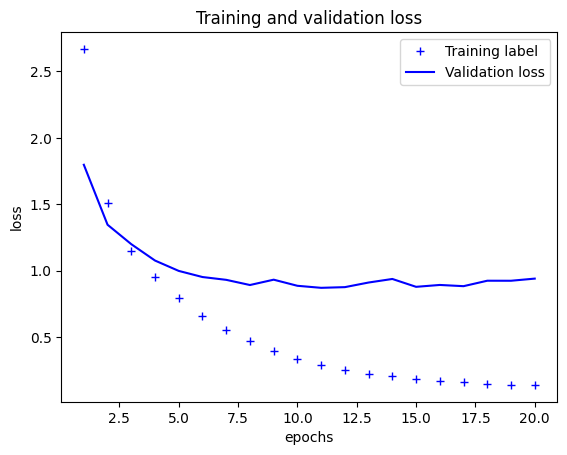

In [234]:
# plotting the model

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'b+',label='Training label')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

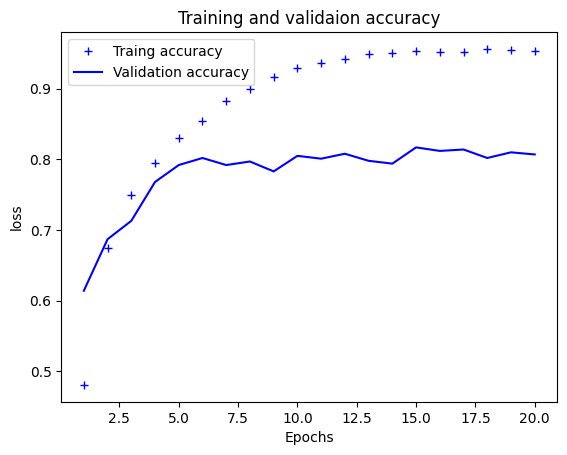

In [235]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs,acc,'b+',label='Traing accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validaion accuracy')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [236]:
"""
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))  # Adjust input shape to match your data

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
"""

"\nfrom tensorflow.keras import models, layers\n\nmodel = models.Sequential()\nmodel.add(layers.Dense(64, activation='relu', input_shape=(10000,)))  # Adjust input shape to match your data\n\nmodel.add(layers.Dense(64, activation='relu'))\nmodel.add(layers.Dense(46, activation='softmax'))\n\nmodel.compile(optimizer='rmsprop',\n              loss='categorical_crossentropy',\n              metrics=['accuracy'])\n"

In [237]:
# retraining the model from scratch

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))  # Adjust input shape to match your data

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [238]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [239]:
model.fit(partial_X_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(X_val,y_val))

Epoch 1/9
16/16 [==============================] - 1s 23ms/step - loss: 2.7249 - accuracy: 0.4782 - val_loss: 1.8411 - val_accuracy: 0.6250
Epoch 2/9
16/16 [==============================] - 0s 18ms/step - loss: 1.5304 - accuracy: 0.6907 - val_loss: 1.3721 - val_accuracy: 0.7050
Epoch 3/9
16/16 [==============================] - 0s 15ms/step - loss: 1.1572 - accuracy: 0.7497 - val_loss: 1.1803 - val_accuracy: 0.7500
Epoch 4/9
16/16 [==============================] - 0s 15ms/step - loss: 0.9445 - accuracy: 0.7917 - val_loss: 1.0845 - val_accuracy: 0.7650
Epoch 5/9
16/16 [==============================] - 0s 15ms/step - loss: 0.7857 - accuracy: 0.8250 - val_loss: 1.0229 - val_accuracy: 0.7820
Epoch 6/9
16/16 [==============================] - 0s 15ms/step - loss: 0.6522 - accuracy: 0.8604 - val_loss: 0.9557 - val_accuracy: 0.7960
Epoch 7/9
16/16 [==============================] - 0s 15ms/step - loss: 0.5448 - accuracy: 0.8867 - val_loss: 0.9197 - val_accuracy: 0.7980
Epoch 8/9
16/16 [===

In [240]:
# evaluating the model

results = model.evaluate(X_test,one_hot_test_labels)

71/71 [==============================] - 0s 1ms/step - loss: 0.9592 - accuracy: 0.7823


In [241]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)

float(np.sum(hits_array))/len(test_labels)

0.18655387355298308

In [242]:
# generating predictions on new data

predictions = model.predict(X_test)

71/71 [==============================] - 0s 1ms/step


In [243]:
predictions[0].shape

(46,)

In [244]:
# coffiecients in this vector sum to 1
np.sum(predictions[0])

0.99999994

In [245]:
# a different way to handle labels and loss

y_train=np.array(train_labels)
y_test=np.array(test_labels)

In [246]:
# changing the loss function

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
               metrics=['acc'])

In [247]:
# modeling with an information bottleneck

model = models.Sequential()

model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [248]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [249]:
model.fit(partial_X_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(X_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 24ms/step - loss: 2.7065 - accuracy: 0.5127 - val_loss: 1.8001 - val_accuracy: 0.6160
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.5408 - accuracy: 0.6725 - val_loss: 1.3749 - val_accuracy: 0.6730
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.1856 - accuracy: 0.7419 - val_loss: 1.2029 - val_accuracy: 0.7170
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.9635 - accuracy: 0.7917 - val_loss: 1.0569 - val_accuracy: 0.7680
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.7948 - accuracy: 0.8274 - val_loss: 0.9878 - val_accuracy: 0.7840
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6647 - accuracy: 0.8548 - val_loss: 0.9318 - val_accuracy: 0.7980
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5552 - accuracy: 0.8820 - val_loss: 0.8945 - val_accuracy: 0.8060
Epoch 8/20
16